# PCovC with the Breast Cancer Dataset

In [25]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV

from skmatter.decomposition import PCovC

plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['scatter.edgecolors'] = "k"

random_state = 0

## Load the Breast Cancer Dataset

In [26]:
bcancer = datasets.load_breast_cancer()
print(bcancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## Scale Feature Data
#### Below, we transform the Breast Cancer feature data to have a mean of zero and standard deviation of one, while preserving relative relationships between feature values.

In [27]:
X, y = bcancer.data, bcancer.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA
#### We use Principal Component Analysis to reduce the Breast Cancer feature data to two features that retain as much information as possible about the original dataset.

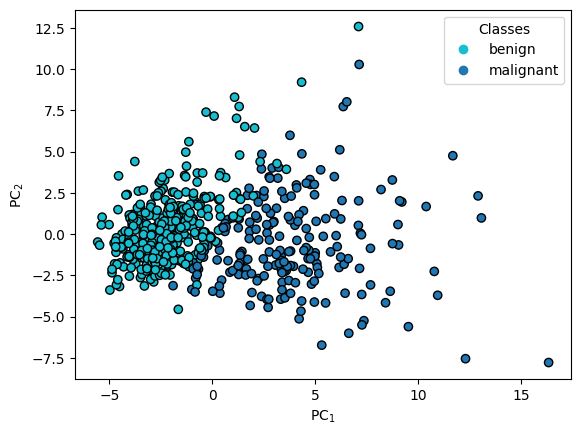

In [28]:
pca = PCA(
    n_components=2
)

pca.fit(X_scaled, y)
T_pca = pca.transform(X_scaled)

fig, axis = plt.subplots()
scatter = axis.scatter(T_pca[:, 0], T_pca[:, 1], c=y)
axis.set(xlabel="PC$_1$", ylabel="PC$_2$")
axis.legend(scatter.legend_elements()[0][::-1], bcancer.target_names[::-1], loc="upper right", title="Classes")

## LDA
#### Here, we use Linear Discriminant Analysis to find a projection of the feature data that maximizes class separability between benign/malignant.

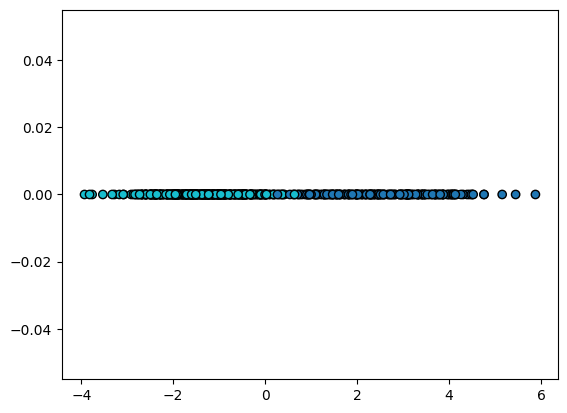

In [29]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_scaled, y)

T_lda = lda.transform(X_scaled)

fig, axis = plt.subplots()
axis.scatter(-T_lda[:], np.zeros(len(T_lda[:])), c=y)

## PCA, PCovC, and LDA
#### Below, we see a side-by-side comparison of PCA, PCovC (Logistic Regression classifier, $\alpha=$ 0.5), and LDA maps of the data. 

LogisticRegressionCV()


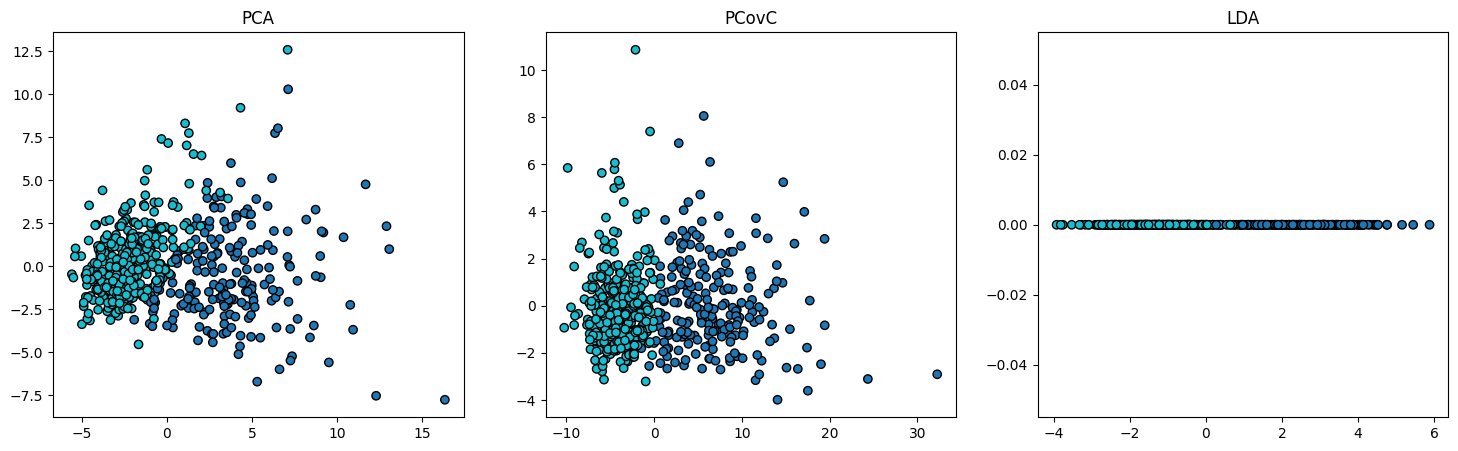

In [30]:
mixing = 0.5
n_models = 3
fig, axes = plt.subplots(1, n_models, figsize=(6*n_models, 5))

models = {
    PCA(
        n_components=2
    ): "PCA",

    PCovC(
        mixing=mixing, 
        n_components=2,
        random_state = random_state, 
        classifier = LogisticRegressionCV()
    ): "PCovC",
    
    LinearDiscriminantAnalysis(
        n_components=1
    ): "LDA"
}

for id in range(0, n_models):
    model = list(models)[id]
    
    model.fit(X_scaled, y)
    T = model.transform(X_scaled)

    if isinstance(model, LinearDiscriminantAnalysis):
        axes[id].scatter(-T_lda[:], np.zeros(len(T_lda[:])), c=y) 
    else:
        axes[id].scatter(T[:, 0], T[:, 1], c=y)
    
    axes[id].set_title(models[model])